# Optimial expression to find

$$Y = weight/height^2$$

# Import packages

In [1]:
from atgfe.GeneticFeatureEngineer import GeneticFeatureEngineer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from yellowbrick.regressor import ResidualsPlot, PredictionError
from lightgbm import LGBMRegressor

In [2]:
df = pd.read_csv('./data/generated_1.csv')
df.head()

,weight,height,age,Y
0,83,1.60,23,32.421875
1,106,1.62,59,40.390184
2,52,1.49,63,23.422368
3,75,1.90,37,20.775623
4,100,1.96,48,26.030820


In [3]:
target = 'Y'
columns = df.drop(target, axis=1).columns.tolist()

In [4]:
X = df.drop(target, axis=1).copy()
Y = df.loc[:, target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

In [5]:
def display_residual_plot(model):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()                 

In [6]:
def prediction_error_plot(model):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()     

In [7]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [8]:
def score_model(model, X, y):
    evaluation_metric_scorer = make_scorer(rmse, greater_is_better=True)
    scores = cross_val_score(estimator=model, X=X, y=y, cv=10, scoring=evaluation_metric_scorer, n_jobs=-1)
    scores_mean = scores.mean()
    score_std = scores.std()
    print('Mean of metric: {}, std: {}'.format(scores_mean, score_std))

In [9]:
def create_new_model():
    return make_pipeline(StandardScaler(), LinearRegression())

# Using LightGBM

In [10]:
lgbm_model = LGBMRegressor(random_state=7)

In [11]:
score_model(lgbm_model, X, Y)

Mean of metric: 0.6249017017326942, std: 0.15867257072040533


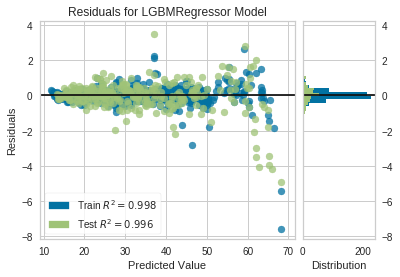

In [12]:
display_residual_plot(lgbm_model)

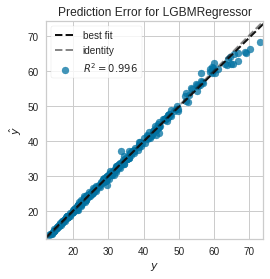

In [13]:
prediction_error_plot(lgbm_model)

# Using Linear Regression

In [14]:
model = create_new_model()

In [15]:
score_model(model, X, Y)

Mean of metric: 3.2686674839023437, std: 0.24578892795551718


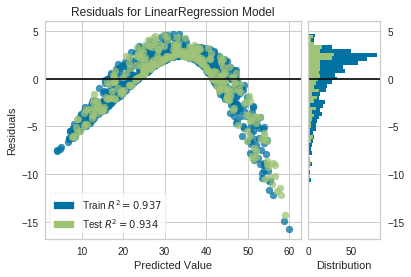

In [16]:
display_residual_plot(model)

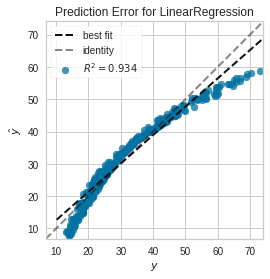

In [17]:
prediction_error_plot(model)

# Using ATgfe

In [18]:
model = create_new_model()

In [19]:
gfe = GeneticFeatureEngineer(model, x_train=X_train, y_train=y_train, numerical_features=columns,
                             number_of_candidate_features=1,
                             number_of_interacting_features=3,
                             evaluation_metric=rmse, minimize_metric=True, verbose=True, cv=10,
                            fit_wo_original_columns=True, enable_feature_transformation_operations=True)

2019-11-13 20:59:51,533:INFO: New Engineer created with the following parameters: 
2019-11-13 20:59:51,534:INFO: 
Model type: <class 'sklearn.pipeline.Pipeline'>
Numerical Features: ['weight', 'height', 'age']
Number of candidate features: 1
Number of interacting features: 3
Evaluation Metric: rmse
Minimize metric is True 


In [20]:
gfe.fit(population_size=1000, early_stopping_patience=3)

2019-11-13 20:59:51,569:INFO: Start of evolution 
2019-11-13 21:00:04,502:INFO:   Evaluated 1000 individuals 
2019-11-13 21:00:04,504:INFO: -- Generation 1 -- 
2019-11-13 21:00:12,574:INFO:   Evaluated 615 individuals 
2019-11-13 21:00:12,577:INFO:   Min 0.33838428599945863 
2019-11-13 21:00:12,579:INFO:   Max 100000000000.0 
2019-11-13 21:00:12,580:INFO:   Avg 2511000007.2104135 
2019-11-13 21:00:12,581:INFO:   Std 15611081928.033983 
2019-11-13 21:00:14,715:INFO: Generation: 1, validation scores: [0.33227274 0.31303021 0.31266046 0.38462369 0.36589107 0.25677542
 0.27864359 0.3319249  0.32953342 0.31090259], mean_score: 0.32162580918630784 
2019-11-13 21:00:14,717:INFO: Generation: 1, best solution features: ['(weight - log(age))/squared(height)'] 
2019-11-13 21:00:14,718:INFO: -- Generation 2 -- 
2019-11-13 21:00:22,527:INFO:   Evaluated 589 individuals 
2019-11-13 21:00:22,531:INFO:   Min 2.9351162638262286e-14 
2019-11-13 21:00:22,532:INFO:   Max 100000000000.0 
2019-11-13 21:00:2

# Apply GFE

In [21]:
X = gfe.transform(X)

In [22]:
X.head(20)

,weight,height,age,weight/squared(height)
0,83,1.60,23,32.421875
1,106,1.62,59,40.390184
2,52,1.49,63,23.422368
3,75,1.90,37,20.775623
4,100,1.96,48,26.030820
5,105,1.54,23,44.273908
6,107,1.83,21,31.950790
7,96,1.23,50,63.454293
8,72,1.58,27,28.841532
9,86,2.04,19,20.665129


In [23]:
model = create_new_model()

In [24]:
score_model(model, X, Y)

Mean of metric: 3.301546536602901e-14, std: 4.553833691518301e-15


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

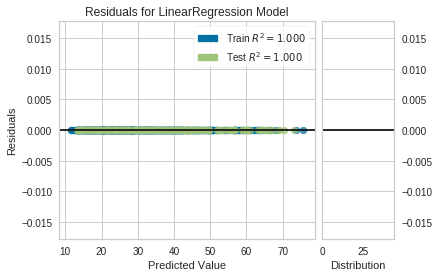

In [26]:
display_residual_plot(model)

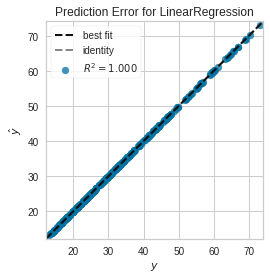

In [27]:
prediction_error_plot(model)